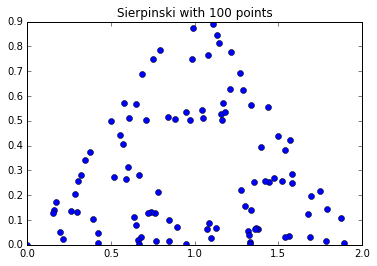

In [2]:
%matplotlib inline

from ipywidgets import interact
import ipywidgets as widgets

# Interactive version of drawing the Sierpinski triangle
# Doing Math with Python (Chapter 6)

'''
sierpinski.py

Draw Sierpinski Triangle
'''
import random
import matplotlib.pyplot as plt

def transformation_1(p):
    x = p[0]
    y = p[1]
    x1 = 0.5*x
    y1 = 0.5*y
    return x1, y1

def transformation_2(p):
    x = p[0]
    y = p[1]
    x1 = 0.5*x + 0.5
    y1 = 0.5*y + 0.5
    return x1, y1

def transformation_3(p):
    x = p[0]
    y = p[1]
    x1 = 0.5*x + 1
    y1 = 0.5*y
    return x1, y1

def get_index(probability):
    r = random.random()
    c_probability = 0
    sum_probability = []
    for p in probability:
        c_probability += p
        sum_probability.append(c_probability)
    for item, sp in enumerate(sum_probability):
        if r <= sp:
            return item
    return len(probability)-1

def transform(p):
    # list of transformation functions
    transformations = [transformation_1, transformation_2, transformation_3]
    probability = [1/3, 1/3, 1/3]
    # pick a random transformation function and call it
    tindex = get_index(probability)
    t = transformations[tindex]
    x, y = t(p)
    return x, y

def draw_sierpinski(n):
    # We start with (0, 0)
    x = [0]
    y = [0]

    x1, y1 = 0, 0
    for i in range(n):
       x1, y1 = transform((x1, y1))
       x.append(x1)
       y.append(y1)  
    
    plt.plot(x, y, 'o')
    plt.title('Sierpinski with {0} points'.format(n))
    plt.show()

i = interact(draw_sierpinski, n=widgets.IntSlider(min=100, max=10000, step=1, value=10))